# Chapter 01 Exercises
## SOLUTIONS
## 1/16/2019

__Important Note 01:__ These homework assignments are meant help you practice and understand __both__ Macroeconomic Theory and Introductory Python. For the first few assignments, the only code you will be asked to write pertains to topics covered in the _Intro to Python for Data Science_ course on Data Camp. All other python code found in the page is meant to demonstrate a concept; you should run it and find out how it works. Little by little, the homework assignments will require your to write more and more of your own python code. A big portion of the future code you will be asked to write is simiar to the code we are currently using in these first assignments, feel free to refer back to it later on.  

In [2]:
# Libraries you will need for this assignment
# *NOTE* You code will not work until you load these libraries
# To load these libraries double click to activate this cell and hit Shift+Enter on your keyboard
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Q1) Country Snapshots

Download the file snapshots.pdf from [web.stanford.edu/~chadj/snapshots.html](web.stanford.edu/~chadj/snapshots.html) and answer the following questions for the current year. 

__(a)__ What was the ratio of per capita income in each of the following countries to that in the Unites States in the current year? Ethiopia, Mexico, India, and Japan. 

Answer: The most recent year's data is available in parenthesis after the title of the series. In this case "GDP per capita (answer)"
Ethiopia = 2.9; Mexico = 29.9; India = 10.5; Japan = 68.5

__(b)__ Which country had the faster average annual growth rate of per capita GDP between 1960 and 2014, Botswana or China?

Answer: Botswana

__(c)__ Rank these countries in order of population: Bangladesh, Brazil, Indonesia, Nigeria, Russia, the United States. 

Answer: Population as of 2010, biggest to smallest: USA (313.7 million), Indonesia (242.3 million), Brazil (196.7 million), Nigeria (162.5 million), Bangladesh (156.5 million), Russia (148.2 million).

__(d)__ Which is larger as a share of GDP in most rich countries, investment or government purchases? What about in most poor countries?

Answer: Government purchases are larger in poor countries, while investment expenditures are higher in rich countries.

__(e)__ Exchange rates are reported as units of deomestic currency (like the Japanese yen or the British pound) per US dollar. Look at the exchange rate for several countries. Do you detect any overall pattern? Why might that be?

Answer: Although there are many exceptions, it appears that money in poorer countries has less value per unit compared to rich countries. 
This is largely because some poor countries have a history of high inflation, so that one unit of their currency becomes worth very little compared to the dollar. 
High inflation is rare in rich countries and much more common in poor countries.

## Q2) Making graphics with Python:

In the following exercises we will use the [snapshots.pdf](http://web.stanford.edu/~chadj/snapshots.pdf) file, together with its hyperlinks to the underlying data. We have already imported, processed the data, and wrote most of the code. You will be required to make small changes to the code to complete the assignment. Please follow the comments below.

__(a)__ Make a plot of per capita GDP (in dollars) for the years 1950 to 2014 for a country of your choice. Label the x-axis "year" and the y-axis "per capita GDP." [Click here for a list of the country codes](http://web.stanford.edu/~chadj/countrycodes6.3). Write a small description of the plot you create.



In [5]:
# Run the code below, only changing what is asked in the comments.

# Determine what country's per capita GDP you'd like to graph.
# Write the 'country code' of your choosing as the variable "country_code" below. 
# Make sure the country code is in single quotes (ex: 'USA')

country_code ='ECU'

# The following code line of code will read and import the data we processed. 
# *DO NOT CHANGE THIS CODE*
percap_gdp = (pd.read_csv('https://raw.githubusercontent.com/dylanjm/econ_381_development/master/data/ch01_gdp.csv')
              .query('country in @country_code'))

# When you are ready to run this code place your cursor in this cell and hit Shift+Enter

<function matplotlib.pyplot.show(*args, **kw)>

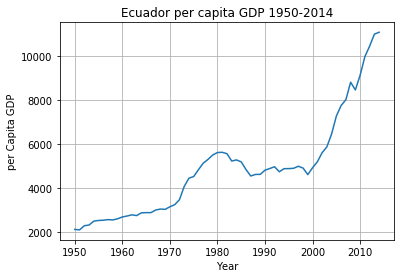

In [6]:
# Now let's create the plot
# The code below creates a plot using the 'x' variable 'year' and 'y' variable 'y_pop'
fig, ax = plt.subplots()
ax.plot(percap_gdp['year'], percap_gdp['y_pop'])

# Change the title of your graphic to fit with whatever country you chose previously!
ax.set(xlabel='Year', ylabel='per Capita GDP',
       title='Ecuador per capita GDP 1950-2014')
ax.grid()
plt.show

Answer: Ecuador has an interesting path of GDP over the period. Looks like my birth was accompanied by calamity. Right after I was born the economy was thrown into a recesssion. The economy didn't recover until after 2000, when the government adoped the US dollar as Ecuador's national currency. Interestingly, I left Ecuador in 2002, so I might have not been the dolarization after all, maybe I just was that much bad luck.

__(b)__ Make a plot of per capita GDP relative to the United States (US = 100) for the years 1950 to 2014 that includes the United States and three other countries of your choice, all on the same graph. Be sure to label the lines on the graph in some informative way so that each line can be associated with its country. Write a small description of the plot you create.

In [10]:
# Insert your 3 countries you'd like to compare to the USA in an array
# Please ensure you keep 'USA' included.
# *Remember:* Arrays are discussed in week 1 of your data camp assignments
three_countries = ['DNK','GTM','KWT','USA']

# Loop through the three countries and append it to the USA dataset
# *DO NOT CHANGE THIS CODE*
percap_gdp = (pd.read_csv('https://raw.githubusercontent.com/dylanjm/econ_381_development/master/data/ch01_gdp.csv')
              .query("country in @three_countries"))

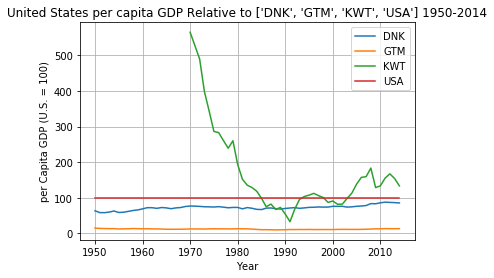

In [11]:
# Please note, you are not required to know this section of code just yet.Just look over it and explore.
# The following code creates a figure that contains more than one data series. Compare it to the
# code we wrote for the previous question.

fig, ax = plt.subplots()
for i in three_countries:
    plot_dat = percap_gdp.query("country == @i")
    ax.plot(plot_dat['year'], plot_dat['y_pop_us_100'], label = i)

# Now let's customize the plot. The following code sets labels on the x and y axis and sets the
# title for the figure. Note that it uses a previously defined variable in the title that changes
# every time you change your choice of countries (see code cell above)

ax.set(xlabel = 'Year', 
       ylabel = 'per Capita GDP (U.S. = 100)',
       title = 'United States per capita GDP Relative to ' + str(three_countries) + ' 1950-2014')
ax.grid()
plt.legend()
plt.show()

Answer: Looks like finding oil is a sure way to increase the GDP per capita of a country. Interestingly, the downward trajectory of GDP per capita is due to a rapid increase in the population. In this case, population grew much faster than GDP. Still, the average citizen of Kuwait earns more than the average American.

## Q3) The Labor Market Model:

Lets add some parameters to the labor market model:

\begin{align*}
\text{labor supply:}\ &L^{s} = \bar{a} \times \omega + \bar{l} \\
\text{labor demand:}\ &L^{d} = \bar{f} - \omega
\end{align*}

The parameters in this setup are $\bar{a},\bar{l},\text{ and }\bar{f}$. (Notice that parameters are denoted with an overbar, a convention we will maintain throughout the semester for any variable that is exogenous, or determined outside of the model.) The parameter $\bar{l}$ ) represents the number of hours workers would supply to the market even if the wage wer zero; it therefore relects the inherent amount of time peopale like to work. The parameter $\bar{f}$, in contrast, reflects the amount of labor the firm would like to hire if the wage were zero. It might be thought of as some inherent capacity of the firm (perhaps  because the firm owns a given amount of land and paital that cannot be altered).


__(a)__ What is the economic interpretation of $\bar{a}$.

Answer: $\bar{a}$ tells us how the quantity of labor supplied responds to wages - closely related to the elasticity of labor sypply. 
Informally, it tells us how sensitive workers are to wages when deciding how much to work.

__(b)__ What are the endogenous variables in this model (variables determined within the model)?

Answer: equilibrium quantity of labor, equilibrium wages.

__(c)__ Solve for the equilibrium of the labor market. That is, solve for the endogenous variables as a function of the parameters of the model. 

$w^{*}=\frac{(\bar{f}-\bar{l})}{(1+\bar{a})}$

$L^{*}=\bar{f}-w^{*}$

__(d)__ If $\bar{l}$ increases, what happens to the equilibrium wage and employment levels? Does this make sense?

Answer: If $\bar{l}$ increases, the wage falls, and the equilibrium quantity of labor increases.
This is just what we expect: the labor supply increased exogenously, and workers were willing to work the same hours at a lower wage. In equilibrium, firms decided to hire more workers at a new, lower wage.

Another way of seeing this is by looking at the partial derivaties:

$\frac{\partial w^{*}}{\partial\bar{l}}=\frac{-1}{(1+\bar{a})}$

$\frac{\partial L^{*}}{\partial\bar{l}}=\frac{1}{(1+\bar{a})}$

Please note how the magnitude of the equilibrium response depends on the parameter $\bar{a}$.

__(e)__ Answer the same questions in (d) for an increase in $\bar{f}$.

Answer: This is an increase in demand: the quantity and wage of labor will both rise in equilibrium. The wage rises a bit, to which workers respond by supplying more labor.

Another way of seeing this is by looking at the partial derivaties:

$\frac{\partial w^{*}}{\partial\bar{f}}=\frac{1}{(1+\bar{a})}$

$\frac{\partial L^{*}}{\partial\bar{f}}=1-\frac{1}{(1+\bar{a})}$

Please note how the magnitude of the equilibrium response depends on the parameter $\bar{a}$.